# kMeans clustering

In this lab you will separate iris species as well as you can using
k-means clustering.  Proceed as follows:

1. load the iris data
2. select two features.  Plot the data, depict the (true) species as
different colors.
3. perform k-means clustering.  Try different $k$-s (2,3,4,5 or so).
Disregarding the true species, think which one gives you the best
clustering.
4. repeat the exercise with different pairs of features.
5. pick your "favorite 2d model": the model that seems visually the
most convincing.
6. Now do kmeans on all 4 features.  Compare the results with the true
species and compute accuracy.  Note: the k-means detected cluster id-s
may be different from the original id-s.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import sklearn.datasets as ds
from sklearn.cluster import KMeans

## 1. load the data

In [31]:
iris = ds.load_iris()
#print(iris)
x = iris['data'][:,:2]
# select 1st and 2nd feature
y = iris['target']


## 2. plot data

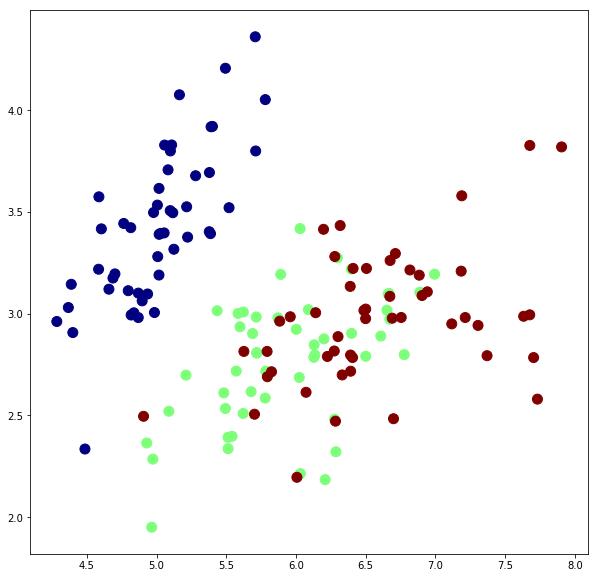

In [32]:
plt.jet()
plt.figure(figsize=(10,10))
sd = 0.02
plt.scatter(x[:,0] + np.random.normal(0, sd, 150), x[:,1] + np.random.normal(0, sd, 150), c=y, s=100)
#plt.scatter(x[:,0] , x[:,1] , c=y, s=100)


## 3. kmeans

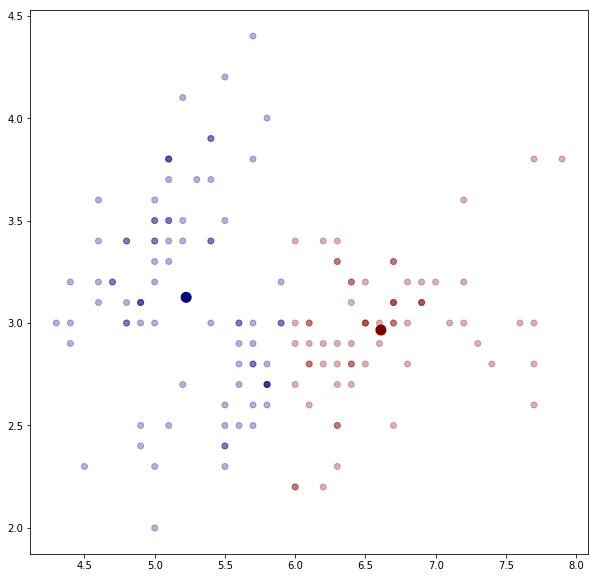

In [10]:
km = KMeans(2)
hatY = km.fit(x).labels_
mu = km.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=hatY, alpha=0.3)
plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)

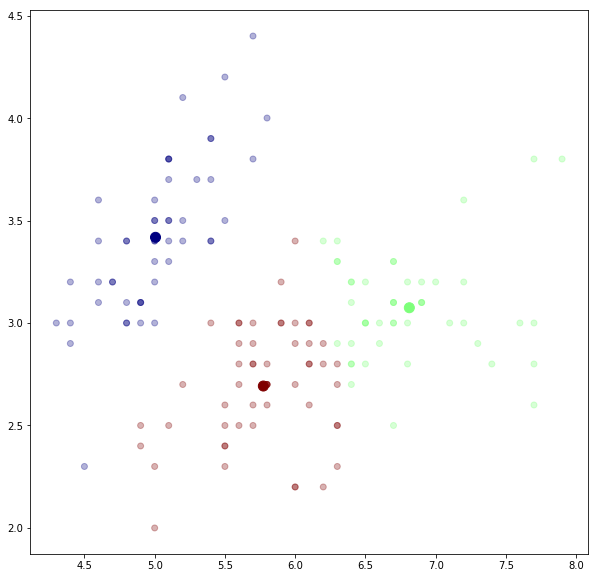

In [33]:
km = KMeans(3)
hatY = km.fit(x).labels_
mu = km.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=hatY, alpha=0.3)
plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)

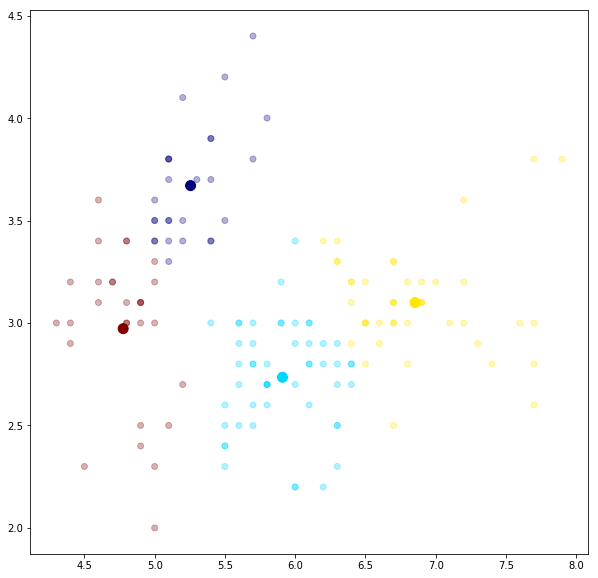

In [13]:
km = KMeans(4)
hatY = km.fit(x).labels_
mu = km.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=hatY, alpha=0.3)
plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)

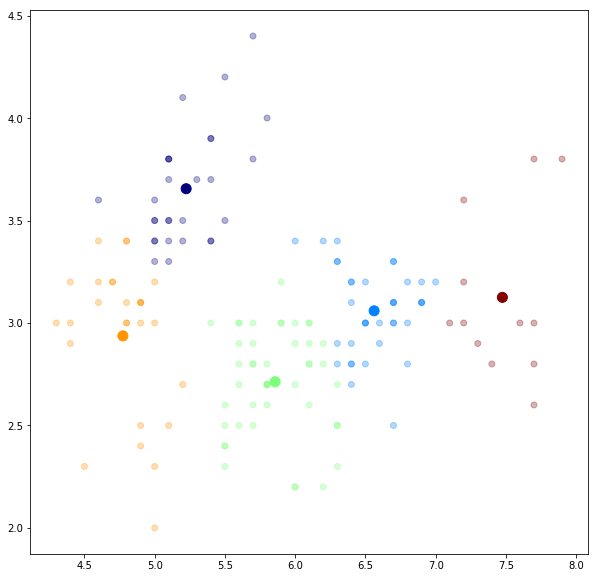

In [35]:
km = KMeans(5)
hatY = km.fit(x).labels_
mu = km.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=hatY, alpha=0.3)
plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)

After trying multiple K means, None of them are able to clearly replicate the original split. We can probably use split 3, but it is not that great

## 4. try other covariates

In [37]:
x = iris['data'][:,1:3]
# select 3rd and 4th feature
y = iris['target']

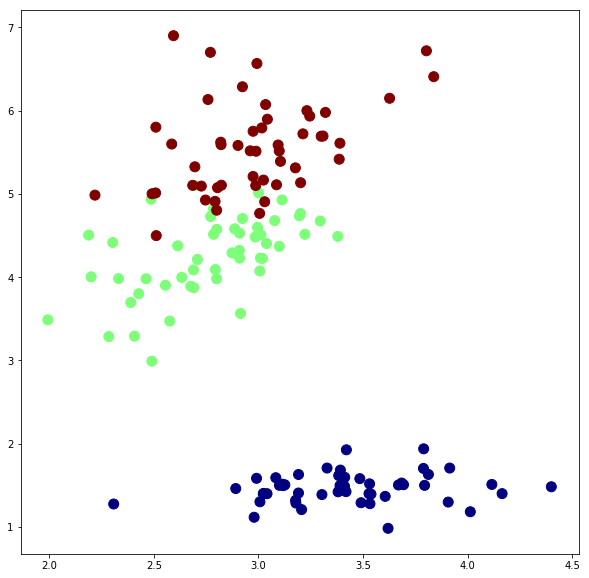

In [40]:
plt.jet()
plt.figure(figsize=(10,10))
sd = 0.02
plt.scatter(x[:,0] + np.random.normal(0, sd, 150), x[:,1] + np.random.normal(0, sd, 150), c=y, s=100)
#plt.scatter(x[:,0] , x[:,1] , c=y, s=100)


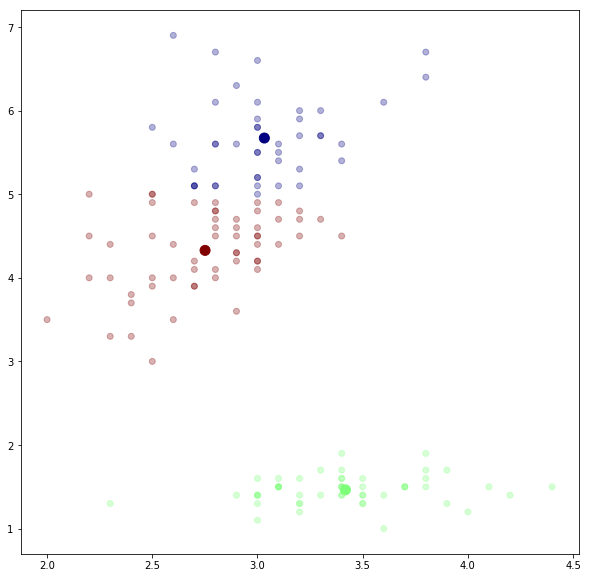

In [39]:
km = KMeans(3)
hatY = km.fit(x).labels_
mu = km.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=hatY, alpha=0.3)
plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)

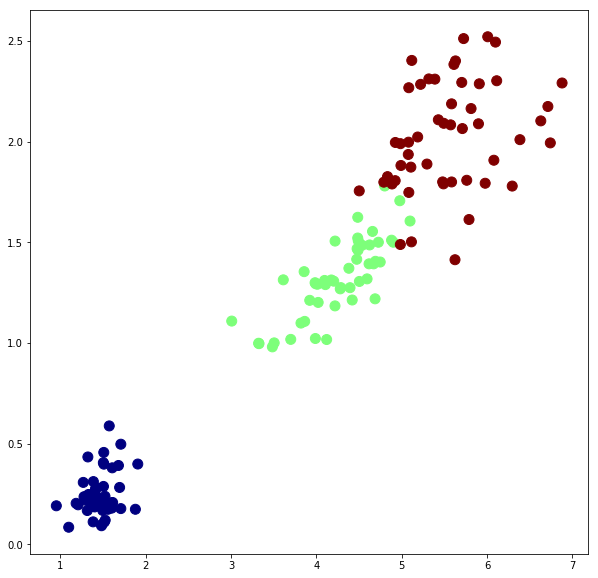

In [41]:
x = iris['data'][:,2:]
# select 2nd and 3rd feature
y = iris['target']
#print(x)

plt.jet()
plt.figure(figsize=(10,10))
sd = 0.02
plt.scatter(x[:,0] + np.random.normal(0, sd, 150), x[:,1] + np.random.normal(0, sd, 150), c=y, s=100)
#plt.scatter(x[:,0] , x[:,1] , c=y, s=100)


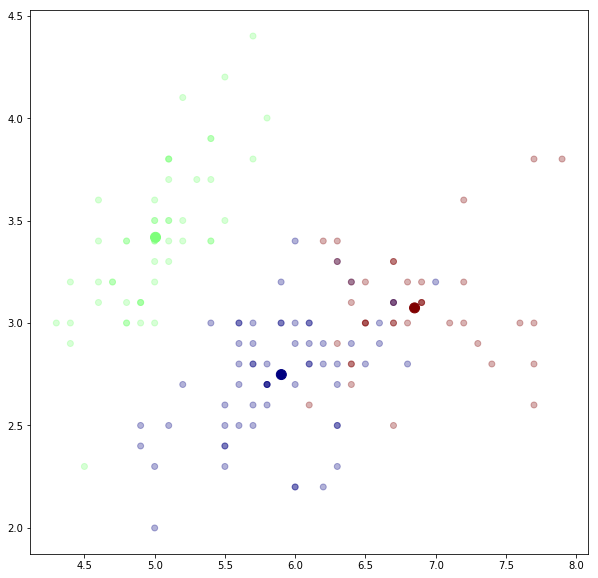

In [45]:
km = KMeans(3)
hatY = km.fit(x).labels_
mu = km.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], c=hatY, alpha=0.3)
plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)

Accuracy: 0.09333333333333334


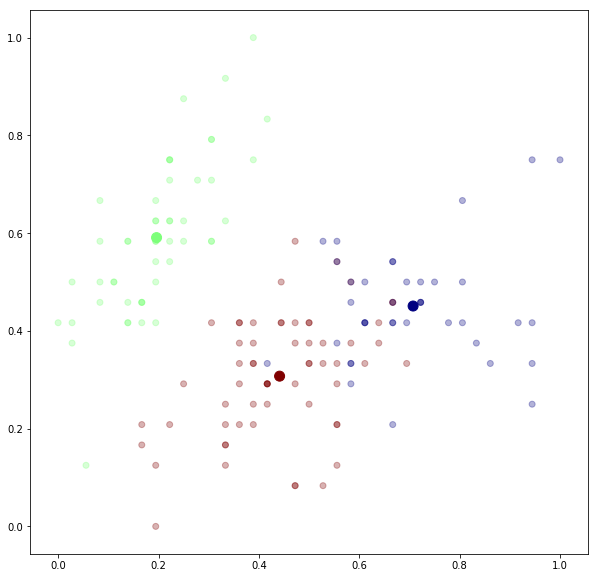

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_s = scaler.transform(x)


km = KMeans(3)
hatY = km.fit(x_s).labels_
mu = km.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(x_s[:,0], x_s[:,1], c=hatY, alpha=0.3)
plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)
print("Accuracy:",accuracy_score(hatY,y))

Tried to experiment with 1) petal length&width 2)sepal width & petal length 3)scaled sepal width & petal length. There was negligible difference between 2 &3, but overall 1,2,3 performed better. To determine the best model, we need to run accuracy check.

## 5. Pick the best


My choice of 2d model visually would be model with petal length & petal width(3,4 features)

## 6. all 4 features

In [60]:
iris = ds.load_iris()
#Get all the columns from Iris data
x = iris['data'][:,:]
y = iris['target']
#print(x)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_s = scaler.transform(x)

km = KMeans(3)
# find 4 clusters
hatY = km.fit(x).labels_
mu = km.cluster_centers_
#plt.figure(figsize=(10,10))
#plt.scatter(x[:,0], x[:,1], c=hatY, alpha=0.3)
#plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)

print(hatY)
print(y)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(hatY,y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy: 0.8933333333333333


I had to rerun the codes, to make sure that the cluster IDs are same in actual & predicted.